In [5]:
from math import sqrt
# x = [1,3]
# y = [2,5]
# euclidean_distance = sqrt(sum([(x-y)**2 for x, y in zip(x,y)]))

In [6]:
euclidean_distance

2.23606797749979

In [7]:
import numpy as np

In [8]:
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from collections import Counter
style.use('fivethirtyeight')

In [9]:
euclidean_distance = sqrt(sum([(x-y)**2 for x, y in zip(x,y)]))


In [10]:
dataset = {'k': [[1,2],[2,3],[3,1]], 'r': [[6,5],[7,7],[8,6]]}

In [11]:
new_features = [5,7]


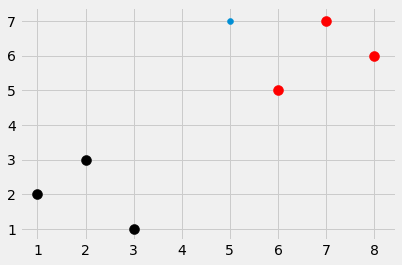

In [13]:

# [[plt.scatter(ii[0],ii[1], s = 100, color = i) for ii in dataset[i]] for i in dataset]
# # for i in dataset:
# #     for ii in dataset[i]:
# #         plt.scatter(ii[0],ii[1], s = 100, color = i)
# plt.scatter(new_features[0], new_features[1])
# plt.show()

In [60]:
def k_nearest_neighbors(data, predict, k = 3):
    if len(data)>=k:
        warnings.warn('K is set to a value less than the total voting groups!')
    #knnalgos
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance, group])
            
    votes = [i[1] for i in sorted(distances)[:k]]
    vote_results = Counter(votes).most_common(1)[0][0]  
    confidence = Counter(votes).most_common(1)[0][1]/k
    #print(vote_results, confidence)
    return vote_results, confidence
        
    
result = k_nearest_neighbors(dataset, new_features, k = 3)
print(result)
    

('r', 1.0)


In [62]:
# [[plt.scatter(ii[0],ii[1], s = 100, color = i) for ii in dataset[i]] for i in dataset]
# plt.scatter(new_features[0], new_features[1], color = result)
# plt.show()

In [48]:
import pandas as pd
import random

In [71]:
accuracies = []
for i in range(25):
    df = pd.read_csv('breast-cancer-wisconsin.data')
    df.replace('?', -99999, inplace=True)
    df.drop(['id'], 1, inplace=True)
    fulldata = df.astype(float).values.tolist() #convert everything to float
    random.shuffle(fulldata[:5])
    test_size = 0.4
    train_set = {2:[],4:[]}
    test_set = {2:[],4:[]}
    train_data = fulldata[:-int(test_size*len(fulldata))]
    test_data = fulldata[-int(test_size*len(fulldata)):]
    for i in train_data:
        train_set[i[-1]].append(i[:-1])
    
    for i in test_data:
        test_set[i[-1]].append(i[:-1])
    
    correct = 0
    total = 0
    for group in test_set:
        for data in test_set[group]:
            votes, confidence = k_nearest_neighbors(train_set, data, k = 5)
            if group == votes:
                correct += 1
#             else:
#                 print(confidence)
            total += 1
        
  #  print('Accuracy:', correct/total)
    accuracies.append(correct/total)

print(sum(accuracies)/len(accuracies))


0.9892473118279564


In [51]:
print(fulldata[:10])

# X = np.array(df.drop(['class'],1))
# y = np.array(df['class'])

[[5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0], [5.0, 4.0, 4.0, 5.0, 7.0, 10.0, 3.0, 2.0, 1.0, 2.0], [3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 2.0], [6.0, 8.0, 8.0, 1.0, 3.0, 4.0, 3.0, 7.0, 1.0, 2.0], [4.0, 1.0, 1.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0], [8.0, 10.0, 10.0, 8.0, 7.0, 10.0, 9.0, 7.0, 1.0, 4.0], [1.0, 1.0, 1.0, 1.0, 2.0, 10.0, 3.0, 1.0, 1.0, 2.0], [2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0], [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 5.0, 2.0], [4.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0]]


In [52]:
random.shuffle(fulldata[:5])

In [53]:
print(fulldata[:10])

[[5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0], [5.0, 4.0, 4.0, 5.0, 7.0, 10.0, 3.0, 2.0, 1.0, 2.0], [3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 2.0], [6.0, 8.0, 8.0, 1.0, 3.0, 4.0, 3.0, 7.0, 1.0, 2.0], [4.0, 1.0, 1.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0], [8.0, 10.0, 10.0, 8.0, 7.0, 10.0, 9.0, 7.0, 1.0, 4.0], [1.0, 1.0, 1.0, 1.0, 2.0, 10.0, 3.0, 1.0, 1.0, 2.0], [2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0], [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 5.0, 2.0], [4.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0]]


0.8
0.6
0.8
Accuracy: 0.989247311827957
